# IBM Capstone Project

In this project I will find out the best neighborhood in Toronto for entrepreneurs to open a new Indian Restaurant by:

 - Using multiple datasets from different sources (i.e. Web, Geocode, CSV files, Foursquare API)
 - Python Webscraping using Beautifulsoup
 - Data Preprocessing
 - Data Analysis

In [1]:
# import necessary lobrabries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import requests
import json
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup

print('Packages installed')

Packages installed


In [2]:
# Get the neighborhood data using beautiful Soup

url  = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html = urllib.request.urlopen(url).read().decode()

In [3]:
soup = BeautifulSoup(html,'html.parser')
table = soup.find('table')

In [4]:
table = str(table)
table

'<table class="wikitable sortable">\n<tbody><tr>\n<th>Postal Code\n</th>\n<th>Borough\n</th>\n<th>Neighbourhood\n</th></tr>\n<tr>\n<td>M1A\n</td>\n<td>Not assigned\n</td>\n<td>Not assigned\n</td></tr>\n<tr>\n<td>M2A\n</td>\n<td>Not assigned\n</td>\n<td>Not assigned\n</td></tr>\n<tr>\n<td>M3A\n</td>\n<td>North York\n</td>\n<td>Parkwoods\n</td></tr>\n<tr>\n<td>M4A\n</td>\n<td>North York\n</td>\n<td>Victoria Village\n</td></tr>\n<tr>\n<td>M5A\n</td>\n<td>Downtown Toronto\n</td>\n<td>Regent Park, Harbourfront\n</td></tr>\n<tr>\n<td>M6A\n</td>\n<td>North York\n</td>\n<td>Lawrence Manor, Lawrence Heights\n</td></tr>\n<tr>\n<td>M7A\n</td>\n<td>Downtown Toronto\n</td>\n<td>Queen\'s Park, Ontario Provincial Government\n</td></tr>\n<tr>\n<td>M8A\n</td>\n<td>Not assigned\n</td>\n<td>Not assigned\n</td></tr>\n<tr>\n<td>M9A\n</td>\n<td>Etobicoke\n</td>\n<td>Islington Avenue, Humber Valley Village\n</td></tr>\n<tr>\n<td>M1B\n</td>\n<td>Scarborough\n</td>\n<td>Malvern, Rouge\n</td></tr>\n<tr>\n<td>M2

In [5]:
#pd.read_html(table) This  will return the list of Data Frames 
df = pd.read_html(table)[0]
df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


We see that there are Not assigned Borough's so we need to remove those

In [6]:
#df.drop(df[df['Borough']=='Not assigned'].index).reset_index(drop=True)

df_borough=df[df['Borough']!='Not assigned'].reset_index(drop=True)

In [7]:
df_grouped=df_borough.groupby(['Borough','Postal Code'],as_index=False).agg(lambda x: ','.join(x))
#df_borough.sort_values(by=['Borough','Postal Code']).head(9).reset_index(drop=True)

In [8]:
df_grouped.head()

,Borough,Postal Code,Neighbourhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,"North Toronto West, Lawrence Park"
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park, Summerhill East"


In [9]:
# Lets check if we have any not assigned values

df_grouped[df_grouped['Borough']=='Not assigned']

,Borough,Postal Code,Neighbourhood


In [10]:
df_borough = df_grouped

In [11]:
df_borough

,Borough,Postal Code,Neighbourhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,"North Toronto West, Lawrence Park"
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park, Summerhill East"
...,...,...,...
98,York,M6C,Humewood-Cedarvale
99,York,M6E,Caledonia-Fairbanks
100,York,M6M,"Del Ray, Mount Dennis, Keelsdale and Silverthorn"
101,York,M6N,"Runnymede, The Junction North"


In [12]:
# rearrange the columns
df_borough.rename(columns={'Neighbourhood':'Neighborhood'},inplace=True)
df_borough=df_borough[['Postal Code','Borough','Neighborhood']]

In [13]:
df_borough

,Postal Code,Borough,Neighborhood
0,M4N,Central Toronto,Lawrence Park
1,M4P,Central Toronto,Davisville North
2,M4R,Central Toronto,"North Toronto West, Lawrence Park"
3,M4S,Central Toronto,Davisville
4,M4T,Central Toronto,"Moore Park, Summerhill East"
...,...,...,...
98,M6C,York,Humewood-Cedarvale
99,M6E,York,Caledonia-Fairbanks
100,M6M,York,"Del Ray, Mount Dennis, Keelsdale and Silverthorn"
101,M6N,York,"Runnymede, The Junction North"


Now we are going to create a new table with the Latitudes and Longitudes corresponding to the different PostalCodes

In [14]:
# We are haivng the url in which we are having the latitude and longitude values
geo_url = 'https://cocl.us/Geospatial_data'
geo_df = pd.read_csv(geo_url)
geo_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Next we will merge the dataframes 

In [66]:
df=pd.merge(df_borough,geo_df,on='Postal Code')
df.shape

(103, 5)

In [16]:
# Lets findout the number of neighborhoods in each Borough
df.groupby('Borough').count()

,Postal Code,Neighborhood,Latitude,Longitude
Borough,,,,
Central Toronto,9,9,9,9
Downtown Toronto,19,19,19,19
East Toronto,5,5,5,5
East York,5,5,5,5
Etobicoke,12,12,12,12
Mississauga,1,1,1,1
North York,24,24,24,24
Scarborough,17,17,17,17
West Toronto,6,6,6,6


# Now we will find all the neighborhood that have toronto in it

In [17]:
df_toronto=df[df['Borough'].str.contains('Toronto')]

In [18]:
df_toronto=df_toronto.reset_index(drop=True)

In [19]:
df_toronto

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
1,M4P,Central Toronto,Davisville North,43.712751,-79.390197
2,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,M4S,Central Toronto,Davisville,43.704324,-79.388790
4,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
5,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049
6,M5N,Central Toronto,Roselawn,43.711695,-79.416936
7,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307
8,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678
9,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529


In [71]:
# Let's check the latitude and Longitude of central toronto.
toronto_latitude = 43.6532
toronto_longitude = -79.3832

print('Latitude and Longitude values for toronto are {} and {}'.format(toronto_latitude, toronto_longitude))

central_toronto = df_toronto[df_toronto['Borough'] == 'Central Toronto']
central_toronto

Latitude and Longitude values for toronto are 43.6532 and -79.3832


,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
1,M4P,Central Toronto,Davisville North,43.712751,-79.390197
2,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,M4S,Central Toronto,Davisville,43.704324,-79.388790
4,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
5,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049
6,M5N,Central Toronto,Roselawn,43.711695,-79.416936
7,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307
8,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678


### Let's get the map the central toronto and it's neighborhood

In [72]:
map_toronto = folium.Map(location=[toronto_latitude, toronto_longitude],zoom_start=12)

for lat, lng, bor, neigh in zip(central_toronto['Latitude'], central_toronto['Longitude'], central_toronto['Borough'], central_toronto['Neighborhood']):
    label_text = bor + '-' + neigh
    label = folium.Popup(label_text)
    folium.CircleMarker(
    [lat, lng],
    radius = 5,
    popup = label,    
    fill = True,
    fill_color = 'Red',
    fill_opacity = '0.8'    
    ).add_to(map_toronto)

map_toronto

### Next we will use foursquare credentials

In [22]:
with open('credentials.json') as f:
    data  = json.load(f)
    CLIENT_ID = data['CLIENT_ID']
    CLIENT_SECRET = data['CLIENT_SECRET'] 

VERSION = '20201216'
print('Credentials restored')

Credentials restored


In [23]:
df_toronto.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
1,M4P,Central Toronto,Davisville North,43.712751,-79.390197
2,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,M4S,Central Toronto,Davisville,43.704324,-79.388790
4,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160


In [24]:
df_toronto.tail()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
34,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750
35,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191
36,M6P,West Toronto,"High Park, The Junction South",43.661608,-79.464763
37,M6R,West Toronto,"Parkdale, Roncesvalles",43.648960,-79.456325
38,M6S,West Toronto,"Runnymede, Swansea",43.651571,-79.484450


In [88]:
df_toronto.shape

(39, 5)

#### Lets get the 100 venues near neighborhood Lawrence Park within the radius of 500 meter

In [75]:
# Lets check out lawrence park
lat  = 43.728020
lng  = -79.388790
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&limit={}&radius={}'.format(
               CLIENT_ID, 
               CLIENT_SECRET,
               lat,
               lng,
               VERSION,
               LIMIT,
               radius 
               )
print(url)
result = requests.get(url).json()['response']['groups'][0]['items']

https://api.foursquare.com/v2/venues/explore?client_id=GXGV4GQVYQHA00TBYF5XJP4OCFUHINEYCL2OPDEZPGZRYBBR&client_secret=VGGFP2WMHQRWIFWNZTGHEL5OHSFY2NR213IWQLFCLOT3DJZW&ll=43.72802,-79.38879&v=20201216&limit=100&radius=500


In [81]:
from pandas import json_normalize
df_lawrence = json_normalize(result)
df_lawrence=df_lawrence[['venue.name','venue.location.lat','venue.location.lng','venue.categories']]
df_lawrence.head()

,venue.name,venue.location.lat,venue.location.lng,venue.categories
0,Lawrence Park Ravine,43.726963,-79.394382,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P..."
1,Zodiac Swim School,43.728532,-79.382860,"[{'id': '52e81612bcbc57f1066b7a44', 'name': 'S..."
2,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,"[{'id': '4bf58dd8d48988d12b951735', 'name': 'B..."


In [82]:
# lets get the category

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list  = row['venue.categories']
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [83]:
df_lawrence['venue.categories'] = df_lawrence.apply(get_category_type,axis=1)

In [84]:
df_lawrence

,venue.name,venue.location.lat,venue.location.lng,venue.categories
0,Lawrence Park Ravine,43.726963,-79.394382,Park
1,Zodiac Swim School,43.728532,-79.382860,Swim School
2,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line


#### So we got the venues around the lawrence park. Lets do the same process to get the venues near all the neighborhood

In [90]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [91]:
toronto_venues=get_nearby_venues(names=df_toronto['Neighborhood'], 
                                 latitudes=df_toronto['Latitude'], 
                                 longitudes=df_toronto['Longitude'])

Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Queen's Park, Ontario Provincial Government
The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Business reply mail Processing Centre, South Central Letter 

In [92]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,43.728020,-79.388790,Lawrence Park Ravine,43.726963,-79.394382,Park
1,Lawrence Park,43.728020,-79.388790,Zodiac Swim School,43.728532,-79.382860,Swim School
2,Lawrence Park,43.728020,-79.388790,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line
3,Davisville North,43.712751,-79.390197,Homeway Restaurant & Brunch,43.712641,-79.391557,Breakfast Spot
4,Davisville North,43.712751,-79.390197,Sherwood Park,43.716551,-79.387776,Park


In [93]:
toronto_venues.shape

(1624, 7)

#### Lets checkout vaenues per neighborhood

In [94]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,55,55,55,55,55,55
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",16,16,16,16,16,16
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",16,16,16,16,16,16
Central Bay Street,68,68,68,68,68,68
Christie,16,16,16,16,16,16
Church and Wellesley,75,75,75,75,75,75
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,33,33,33,33,33,33


Lets check the unique categgories

In [95]:
print('There are {} unique categories'.format(len(toronto_venues['Venue Category'].unique())))

There are 235 unique categories


In [96]:
print("The Venue Categories are", toronto_venues['Venue Category'].unique())

The Venue Categories are ['Park' 'Swim School' 'Bus Line' 'Breakfast Spot' 'Food & Drink Shop'
 'Department Store' 'Hotel' 'Sandwich Place' 'Gym / Fitness Center'
 'Dog Run' 'Dance Studio' 'Yoga Studio' 'Spa' 'Salon / Barbershop'
 'Restaurant' 'Mexican Restaurant' 'Chinese Restaurant' 'Diner'
 'Clothing Store' 'Coffee Shop' 'Fast Food Restaurant'
 'Sporting Goods Shop' 'Café' 'Ice Cream Shop' 'Furniture / Home Store'
 'Bagel Shop' 'Dessert Shop' 'Indian Restaurant' 'Pizza Place'
 'Seafood Restaurant' 'Sushi Restaurant' 'Italian Restaurant'
 'Thai Restaurant' 'Gym' 'Brewery' 'Toy / Game Store' 'Greek Restaurant'
 'Gas Station' 'Farmers Market' 'Gourmet Shop' 'Pharmacy'
 'Indoor Play Area' 'Trail' 'Playground' 'Liquor Store' 'Supermarket'
 'American Restaurant' 'Pub' 'Vietnamese Restaurant' 'Fried Chicken Joint'
 'Bank' 'Light Rail Station' 'Garden' 'Music Venue' 'Jewelry Store'
 'Burger Joint' 'Donut Shop' 'BBQ Joint' 'Middle Eastern Restaurant'
 'History Museum' 'Japanese Restaurant' '

# Are there any indian Restaurant in venues ?

In [101]:
'Indian Restaurant' in toronto_venues['Venue Category'].unique()

True

# Now lets analyze the neighborhood

In [102]:
toronto_onehot=pd.get_dummies(toronto_venues[['Venue Category']],prefix='',prefix_sep='')

toronto_onehot['Neighborhoods'] = toronto_venues['Neighborhood']

In [103]:
fixed_columns=[toronto_onehot.columns[-1]]+list(toronto_onehot.columns[:-1])

In [104]:
toronto_onehot = toronto_onehot[fixed_columns]

In [105]:
toronto_onehot

,Neighborhoods,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Davisville North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Davisville North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,"Runnymede, Swansea",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1620,"Runnymede, Swansea",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1621,"Runnymede, Swansea",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1622,"Runnymede, Swansea",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
toronto_venues[toronto_venues['Venue Category'] == 'Indian Restaurant']

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
32,Davisville,43.704324,-79.388790,Marigold Indian Bistro,43.702881,-79.388008,Indian Restaurant
86,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,Roti Cuisine of India,43.674618,-79.408249,Indian Restaurant
109,"St. James Town, Cabbagetown",43.667967,-79.367675,Butter Chicken Factory,43.667072,-79.369184,Indian Restaurant
183,Church and Wellesley,43.665860,-79.383160,Kothur Indian Cuisine,43.667872,-79.385659,Indian Restaurant
560,Central Bay Street,43.657952,-79.387383,Colaba Junction,43.660940,-79.385635,Indian Restaurant
757,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,Indian Roti House,43.639060,-79.385422,Indian Restaurant
1383,"The Danforth West, Riverdale",43.679557,-79.352188,Sher-E-Punjab,43.677308,-79.353066,Indian Restaurant


In [120]:
toronto_venues[toronto_venues['Neighborhood']=='Central Bay Street']

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
515,Central Bay Street,43.657952,-79.387383,Jimmy's Coffee,43.658421,-79.385613,Coffee Shop
516,Central Bay Street,43.657952,-79.387383,Tim Hortons,43.658570,-79.385123,Coffee Shop
517,Central Bay Street,43.657952,-79.387383,Somethin' 2 Talk About,43.658395,-79.385338,Middle Eastern Restaurant
518,Central Bay Street,43.657952,-79.387383,Hailed Coffee,43.658833,-79.383684,Coffee Shop
519,Central Bay Street,43.657952,-79.387383,NEO COFFEE BAR,43.660130,-79.385830,Coffee Shop
...,...,...,...,...,...,...,...
578,Central Bay Street,43.657952,-79.387383,Tim Hortons,43.659695,-79.388706,Coffee Shop
579,Central Bay Street,43.657952,-79.387383,Second Cup,43.660722,-79.386308,Coffee Shop
580,Central Bay Street,43.657952,-79.387383,Lettieri Espresso Bar + Cafe,43.659185,-79.387264,Café
581,Central Bay Street,43.657952,-79.387383,Teriyaki Experience,43.659884,-79.387879,Restaurant


In [107]:
toronto_grouped=toronto_onehot.groupby('Neighborhoods').mean().reset_index()

In [111]:
toronto_grouped

,Neighborhoods,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Berczy Park,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.018182,0.000000,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Business reply mail Processing Centre, South C...",0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.0625,0.0625,0.0625,0.125,0.125,0.0625,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.014706,0.000000,0.000000,0.014706,0.014706
5,Christie,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
6,Church and Wellesley,0.013333,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.013333,0.000000,...,0.013333,0.013333,0.000000,0.000000,0.00,0.000000,0.000000,0.013333,0.000000,0.026667
7,"Commerce Court, Victoria Hotel",0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.040000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000
8,Davisville,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.030303,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
9,Davisville North,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000


In [118]:
toronto_grouped[toronto_grouped['Neighborhoods'] == 'Central Bay Street']['Indian Restaurant']

4    0.014706
Name: Indian Restaurant, dtype: float64

In [110]:
ind_res=toronto_grouped[['Neighborhoods','Indian Restaurant']]
ind_res.head()

,Neighborhoods,Indian Restaurant
0,Berczy Park,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000
2,"Business reply mail Processing Centre, South C...",0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000
4,Central Bay Street,0.014706


In [126]:
ind_res.sort_values(by='Indian Restaurant',ascending=False).reset_index(drop=True)

,Neighborhoods,Indian Restaurant
0,"The Annex, North Midtown, Yorkville",0.052632
1,Davisville,0.030303
2,"The Danforth West, Riverdale",0.023256
3,"St. James Town, Cabbagetown",0.020833
4,Central Bay Street,0.014706
5,Church and Wellesley,0.013333
6,"Harbourfront East, Union Station, Toronto Islands",0.010000
7,Berczy Park,0.000000
8,"Regent Park, Harbourfront",0.000000
9,"Richmond, Adelaide, King",0.000000


### From the above we can see that there are total 7 neighborhoods having indian Restaurants

### Now we will cluster the neighborhoods

In [130]:
from sklearn.cluster import KMeans

kclusters = 5

toronto_grouped_clustering = ind_res.drop('Neighborhoods',1)

#run k-means
kmeans = KMeans(n_clusters = kclusters, init = 'k-means++',random_state=0).fit(toronto_grouped_clustering)

#chekcing the labels
kmeans.labels_

array([0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 3, 0, 4, 0, 0])

In [132]:
#create the new dataframe that includes the clster as well as top 10 venue for each neighborhoods

tor_merged = ind_res.copy()

#adding clustering labels
tor_merged['Cluster Labels'] = kmeans.labels_

In [133]:
tor_merged

,Neighborhoods,Indian Restaurant,Cluster Labels
0,Berczy Park,0.000000,0
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0
2,"Business reply mail Processing Centre, South C...",0.000000,0
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0
4,Central Bay Street,0.014706,2
5,Christie,0.000000,0
6,Church and Wellesley,0.013333,2
7,"Commerce Court, Victoria Hotel",0.000000,0
8,Davisville,0.030303,1
9,Davisville North,0.000000,0


In [140]:
toronto_merged=pd.merge(tor_merged, toronto_venues, left_on='Neighborhoods', right_on = 'Neighborhood')

toronto_merged.drop('Neighborhood',axis=1,inplace=True)

toronto_merged.head()

,Neighborhoods,Indian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berczy Park,0.0,0,43.644771,-79.373306,The Keg Steakhouse + Bar - Esplanade,43.646712,-79.374768,Restaurant
1,Berczy Park,0.0,0,43.644771,-79.373306,LCBO,43.642944,-79.372440,Liquor Store
2,Berczy Park,0.0,0,43.644771,-79.373306,Fresh On Front,43.647815,-79.374453,Vegetarian / Vegan Restaurant
3,Berczy Park,0.0,0,43.644771,-79.373306,Goose Island Brewhouse,43.647329,-79.373541,Beer Bar
4,Berczy Park,0.0,0,43.644771,-79.373306,Hockey Hall Of Fame (Hockey Hall of Fame),43.646974,-79.377323,Museum


In [141]:
toronto_merged.shape

(1624, 9)

Lets checkout how many indian restaurants are there

In [146]:
toronto_merged['Venue Category'].value_counts()['Indian Restaurant']

7

#### Lets create the Map

In [169]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

x=np.arange(kclusters)
#print(x)
ys=[i+x+(i*x)**2  for i in range(kclusters)]
colors=cm.rainbow(np.linspace(0,1,len(ys)))
rainbow = [mcolors.rgb2hex(i) for i in colors]

lat_toronto = 43.6532
lon_toronto = -79.3832
map_cluster=folium.Map(location=[lat_toronto, lon_toronto], zoom_start=12)

for lat, lng, nh, cluster in zip(toronto_merged['Neighborhood Latitude'], toronto_merged['Neighborhood Longitude'], toronto_merged['Neighborhoods'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(nh) +  ' Cluster ' + str(cluster))
    folium.CircleMarker(
    [lat, lng],
    radius = 5,
    color = rainbow[cluster-1],   
    popup = label,    
    fill = True,
    fill_opacity = 0.5    
    ).add_to(map_cluster)
    
map_cluster    

In [173]:
ind_res['Cluster Label'] = kmeans.labels_
ind_res.head()

<ipython-input-173-e344f875881e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_res['Cluster Label'] = kmeans.labels_


,Neighborhoods,Indian Restaurant,Cluster Label
0,Berczy Park,0.000000,0
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0
2,"Business reply mail Processing Centre, South C...",0.000000,0
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0
4,Central Bay Street,0.014706,2


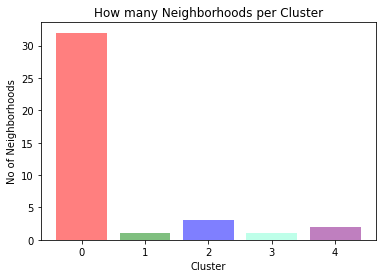

In [189]:
import matplotlib.pyplot as plt
objects = (0,1,2,3,4)
y_pos = np.arange(len(objects))
performance=ind_res['Cluster Label'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Label'].to_list()
plt.bar(y_pos, perf, align='center',alpha=0.5,color=['red','green','blue','aquamarine','purple'])
plt.xticks(y_pos);
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('How many Neighborhoods per Cluster')

plt.show()

In [190]:
ind_res['Cluster Label'].value_counts()

0    32
2     3
4     2
3     1
1     1
Name: Cluster Label, dtype: int64

# Analysis of each Cluster

### cluster 0

In [192]:
#Lets create the new data Frame
df_new = df[['Borough', 'Neighborhood']]
df_new.head()

,Borough,Neighborhood
0,Central Toronto,Lawrence Park
1,Central Toronto,Davisville North
2,Central Toronto,"North Toronto West, Lawrence Park"
3,Central Toronto,Davisville
4,Central Toronto,"Moore Park, Summerhill East"


In [224]:
cluster0=tor_merged[tor_merged['Cluster Labels']==0]
df_cluster0=pd.merge(df_new, cluster0, left_on='Neighborhood', right_on = 'Neighborhoods')
df_cluster0.drop('Neighborhoods',axis=1,inplace=True)
df_cluster0

,Borough,Neighborhood,Indian Restaurant,Cluster Labels
0,Central Toronto,Lawrence Park,0.0,0
1,Central Toronto,Davisville North,0.0,0
2,Central Toronto,"North Toronto West, Lawrence Park",0.0,0
3,Central Toronto,"Moore Park, Summerhill East",0.0,0
4,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",0.0,0
5,Central Toronto,Roselawn,0.0,0
6,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",0.0,0
7,Downtown Toronto,Rosedale,0.0,0
8,Downtown Toronto,"Regent Park, Harbourfront",0.0,0
9,Downtown Toronto,"Garden District, Ryerson",0.0,0


### Cluster 1

In [225]:
cluster1=tor_merged[tor_merged['Cluster Labels']==1]
df_cluster1=pd.merge(df_new, cluster1 ,left_on='Neighborhood',right_on='Neighborhoods')
df_cluster1.drop('Neighborhoods',axis=1,inplace=True)
df_cluster1

,Borough,Neighborhood,Indian Restaurant,Cluster Labels
0,Central Toronto,Davisville,0.030303,1


### Cluster 2

In [226]:
cluster2=tor_merged[tor_merged['Cluster Labels']==2]
df_cluster2=pd.merge(df_new, cluster2 ,left_on='Neighborhood',right_on='Neighborhoods')
df_cluster2.drop('Neighborhoods',axis=1,inplace=True)
df_cluster2

,Borough,Neighborhood,Indian Restaurant,Cluster Labels
0,Downtown Toronto,Church and Wellesley,0.013333,2
1,Downtown Toronto,Central Bay Street,0.014706,2
2,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",0.010000,2


### Cluster 3

In [227]:
cluster3=tor_merged[tor_merged['Cluster Labels']==3]
df_cluster3=pd.merge(df_new, cluster3 ,left_on='Neighborhood',right_on='Neighborhoods')
df_cluster3.drop('Neighborhoods',axis=1,inplace=True)
df_cluster3

,Borough,Neighborhood,Indian Restaurant,Cluster Labels
0,Central Toronto,"The Annex, North Midtown, Yorkville",0.052632,3


### Cluster 4

In [228]:
cluster4=tor_merged[tor_merged['Cluster Labels']==4]
df_cluster4=pd.merge(df_new, cluster4 ,left_on='Neighborhood',right_on='Neighborhoods')
df_cluster4.drop('Neighborhoods',axis=1,inplace=True)
df_cluster4

,Borough,Neighborhood,Indian Restaurant,Cluster Labels
0,Downtown Toronto,"St. James Town, Cabbagetown",0.020833,4
1,East Toronto,"The Danforth West, Riverdale",0.023256,4


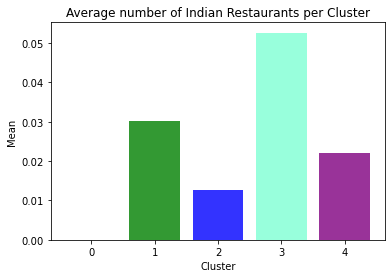

In [231]:
clusters_mean=[df_cluster0['Indian Restaurant'].mean(),df_cluster1['Indian Restaurant'].mean(),df_cluster2['Indian Restaurant'].mean(),
 df_cluster3['Indian Restaurant'].mean(),df_cluster4['Indian Restaurant'].mean()]

objects= (0,1,2,3,4)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red','green','blue','aquamarine','purple'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Indian Restaurants per Cluster')

plt.show()

# Observations

- Most of the Indian Restaurants are in cluster 3 represented by the aquamarine colour.

- Neighborhood of Central Toronto <b>The Annex, North Midtown, Yorkville</b> is having the highest average of Indian         Restaurant.

- We see that in the Downtown Toronto area (cluster 2) has the second last average of Indian Restaurants. Looking at the nearby  venues, the optimum place to put a new Indian Restaurant is in Downtown Toronto as their are many Neighborhoods in the area but little to no Indian Restaurants therefore, eliminating any competition.

- Having 32 neighborhoods in cluster 0, but having no Indian Restaurants provide great opportunity to open Indian Restaurant

- This concludes the optimal findings for this project and recommends the entrepreneur to open an authentic Indian restaurant in these locations with little to no competition. Nonetheless, if the food is authentic, affordable and good taste, I am confident that it will have great following everywhere.